In [5]:
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt
from PIL import Image
import skimage.io

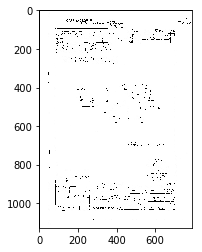

In [6]:
# 读取文件

img = cv2.imread("compare//differenceD.jpg")
plt.imshow(img,'brg')
plt.show()

True

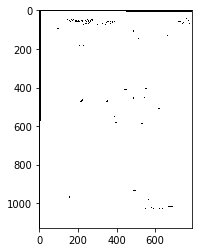

In [14]:

# 设置膨胀和腐蚀操作的核函数
element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))

#erosion1 = cv2.erode(binary, element1, iterations = 1)
# 膨胀一次，让轮廓突出


# 腐蚀一次，去掉细节，如表格线等。注意这里去掉的是竖直的线

#白底黑字：腐蚀和膨胀调换
#黑底白字，eroison 1st，dilation 2nd
erosion = cv2.erode(dilation, element1, iterations = 1)#膨胀
dilation = cv2.dilate(img, element2, iterations = 1)#腐蚀
plt.imshow(erosion)
cv2.imwrite("result//new1.jpg",erosion)

True

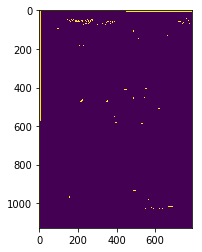

In [9]:
gray = cv2.cvtColor(erosion, cv2.COLOR_BGR2GRAY)
ret,gray = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(gray)
cv2.imwrite("result//gray.jpg",gray)

In [10]:
#  查找和筛选文字区域
region = []

In [11]:
#  查找轮廓
#  是由闭操作和开操作
img2, contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
# 利用以上函数可以得到多个轮廓区域，存在一个列表中。
#  筛选那些面积小的
for i in range(len(contours)):
    # 遍历所有轮廓
    # cnt是一个点集
    cnt = contours[i]

    # 计算该轮廓的面积
    area = cv2.contourArea(cnt) 

    # 面积小的都筛选掉、这个1000可以按照效果自行设置
    if(area < 10):
        continue

#     # 将轮廓形状近似到另外一种由更少点组成的轮廓形状，新轮廓的点的数目由我们设定的准确度来决定
#     # 轮廓近似，作用很小
#     # 计算轮廓长度
#     epsilon = 0.001 * cv2.arcLength(cnt, True)

#     # 
# #     approx = cv2.approxPolyDP(cnt, epsilon, True)

    # 找到最小的矩形，该矩形可能有方向
    rect = cv2.minAreaRect(cnt)
    # 打印出各个矩形四个点的位置
    print ("rect is: ")
    print (rect)

    # box是四个点的坐标
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # 计算高和宽
    height = abs(box[0][1] - box[2][1])
    width = abs(box[0][0] - box[2][0])

    # 筛选那些太细的矩形，留下扁的
    #if(height > width * 1.3):
        #continue
    region.append(box)

rect is: 
((638.4878540039062, 1028.6097412109375), (4.685213088989258, 8.745731353759766), -38.65980911254883)
rect is: 
((620.0000610351562, 1025.0001220703125), (4.242640495300293, 8.485280990600586), -45.0)
rect is: 
((549.25, 1023.7500610351562), (3.535533905029297, 7.071067810058594), -45.0)
rect is: 
((586.15380859375, 1023.2691040039062), (4.714951992034912, 13.312806129455566), -56.3099365234375)
rect is: 
((676.0, 1015.5), (1.0, 20.0), -90.0)
rect is: 
((585.0, 946.5), (1.0, 10.0), -90.0)
rect is: 
((665.5, 942.0), (4.0, 3.0), -90.0)
rect is: 
((489.0, 932.5), (3.0, 8.0), -90.0)
rect is: 
((533.5, 584.5), (9.0, 5.0), -0.0)
rect is: 
((399.5, 583.5), (11.0, 5.0), -0.0)
rect is: 
((390.0, 549.5), (8.0, 5.0), -0.0)
rect is: 
((619.7000122070312, 508.1000061035156), (4.919349193572998, 11.180339813232422), -63.43495178222656)
rect is: 
((353.25, 471.7500305175781), (12.020814895629883, 7.071067810058594), -45.0)
rect is: 
((220.40000915527344, 467.70001220703125), (18.60000038146

True

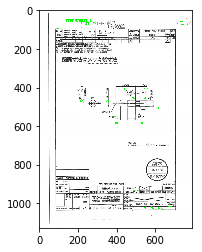

In [13]:
# 用绿线画出这些找到的轮廓
img = cv2.imread("compare//d1.jpg")
for box in region:
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
plt.imshow(img,'brg')
cv2.imwrite("compare\\re3.jpg",img)
#plt.show()